<a href="https://www.kaggle.com/code/rupanshirana/car-s-ex-showroom-price-india-2022?scriptVersionId=123175270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Objective and Problem Statement
- The main aim of this Notebook is to predict the price of cars using various Machine Learning (ML) models.
- Examine Underlying Data Insights which enables the buyers to purchase the car based on some factors and from business point of view which variables are significant in predicting the price of a car and How well those variables describe the price of a car.

#### DataSource: https://www.kaggle.com/datasets/harmeetsingh07/exshowroom-price
- This dataset contains the number of specifications in a new car like height-weight-length, suspension, body, fuel type, Mileage,audio system, etc everything in a brand new car and then based on all those features it's ex-showroom price is given

- This Dataset contains Columns: 141 entries dtypes: float64(6), int64(1), object(134)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/exshowroom-price/cars_engage_2022 (1).csv


## Workflow
- Step 1: Basic Data understanding
- Step 2: Data cleaning and Data Feature Engineering
- Step 3: Data Insights
- Step 4: Data preparation
- Step 5: Model building and evaluation
- Step 6 : Conclusion

#### Step 1: Basic Data understanding

##### 1.1 Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",500)

##### 1.2 Loading the Data Set

In [4]:
df=pd.read_csv("/kaggle/input/exshowroom-price/cars_engage_2022 (1).csv")

##### 1.3 Checking shape

In [5]:
df.shape

(1276, 141)

##### 1.4 Preview of Data

In [6]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

##### 1.5 Drop irrelevant columns

In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
df.shape

(1276, 140)

##### 1.6 Basic understanding of Data

In [9]:
df.info()  ## too many columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


##### 1.7 Fetching column names

In [10]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

#### ...... is called elipses

## Step 2 : Data Cleaning and Feature Engineering

##### 2.1 Checking missing values

In [11]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

- Data contains missing values.

##### 2.2 Checking missing %

In [12]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"----------",df[i].isnull().sum()*100/df.shape[0])

Make ---------- 5.877742946708464
Displacement ---------- 0.9404388714733543
Cylinders ---------- 5.172413793103448
Valves_Per_Cylinder ---------- 7.993730407523511
Drivetrain ---------- 0.54858934169279
Cylinder_Configuration ---------- 1.0188087774294672
Emission_Norm ---------- 0.8620689655172413
Engine_Location ---------- 3.3699059561128526
Fuel_System ---------- 0.6269592476489029
Fuel_Tank_Capacity ---------- 5.407523510971787
Height ---------- 0.07836990595611286
Width ---------- 0.9404388714733543
Body_Type ---------- 0.4702194357366771
Doors ---------- 0.31347962382445144
City_Mileage ---------- 43.495297805642636
Highway_Mileage ---------- 62.69592476489028
ARAI_Certified_Mileage ---------- 8.934169278996865
ARAI_Certified_Mileage_for_CNG ---------- 97.88401253918495
Kerb_Weight ---------- 28.605015673981192
Gears ---------- 8.22884012539185
Ground_Clearance ---------- 22.648902821316614
Front_Brakes ---------- 1.9592476489028212
Rear_Brakes ---------- 1.9592476489028212
Fron

##### 2.3 Deleting the columns having missing % > 70

In [13]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

In [14]:
df.shape

(1276, 115)

- Now , column count is 115.

##### 2.4 Checking column types  in order to handle the missing values accordingly

In [15]:
df.dtypes

Make                        object
Model                       object
Variant                     object
Ex-Showroom_Price           object
Displacement                object
                             ...  
Rain_Sensing_Wipers         object
Leather_Wrapped_Steering    object
Automatic_Headlamps         object
ASR_/_Traction_Control      object
Cruise_Control              object
Length: 115, dtype: object

#### Seggregating the numeric and object data so that we can work on these accordingly.

##### 2.5 Numeric Data

In [16]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)

In [17]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


##### 2.5.1 Filling the missing values of numeric data

In [18]:
df_numeric.isnull().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

##### 2.5.2 Filling missing values of df_numeric with median since median is robust to outliers.

In [19]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

In [20]:
df_numeric.isnull().sum().sum()

0

- Missing values have been filled in the numeric columns.

##### 2.6 Categorical data

#### Now we will be working on columns of object types.

###### df_obj is dataframe having  columns values of  object type only.

In [21]:
df_obj=df.select_dtypes(include="object")
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c...,NaN,Internal,110 litres,NaN,NaN,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,NaN,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,NaN,NaN,NaN,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin

##### 2.6.1 Extracting important categorical features with respect to price in **df_obj_list**
- Since column count of object data type is 110 (large) so we will fetch those columns which are important with respect to car price which we found through domain knowledge.

In [22]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)

45

- Column count is 45 of important features.

##### 2.6.2 Since we consider above columns and fetch the data corresponds to them and save it to df_obj

In [23]:
df_obj=df_obj.loc[:,df_obj_list]

In [24]:
len(df_obj.columns)

45

In [25]:
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,NaN,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2.6.3 Now , Checking the missing values % in df_obj which is having 45 columns

In [26]:
for i in df_obj.columns:
    print(i,"---------",(df_obj[i].isnull().sum()/df_obj.shape[0]))

Make --------- 0.05877742946708464
Model --------- 0.0
Variant --------- 0.0
Ex-Showroom_Price --------- 0.0
Displacement --------- 0.009404388714733543
Drivetrain --------- 0.0054858934169279
Emission_Norm --------- 0.008620689655172414
Keyless_Entry --------- 0.21473354231974923
Power --------- 0.0
Torque --------- 0.001567398119122257
Odometer --------- 0.03369905956112853
Speedometer --------- 0.03526645768025078
Tachometer --------- 0.01018808777429467
Tripmeter --------- 0.047021943573667714
Fuel_Type --------- 0.0
ARAI_Certified_Mileage --------- 0.08934169278996865
Front_Suspension --------- 0.04623824451410658
Rear_Suspension --------- 0.03605015673981191
Ground_Clearance --------- 0.22648902821316613
Boot_Space --------- 0.195141065830721
Audiosystem --------- 0.034482758620689655
Third_Row_AC_Vents --------- 0.28683385579937304
Ventilation_System --------- 0.0274294670846395
Auto-Dimming_Rear-View_Mirror --------- 0.48589341692789967
Hill_Assist --------- 0.6238244514106583


##### 2.6.4 Ambiguity in Model column(Wagon)

In [27]:
df_obj[df_obj["Model"]=="Wagon"].head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1173,Maruti Suzuki R,Wagon,Vxi,"Rs. 4,79,000",998 cc,FWD (Front Wheel Drive),BS 6,Remote,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Analog,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,Maruti Suzuki R,Wagon,Vxi Ags,"Rs. 5,26,000",998 cc,FWD (Front Wheel Drive),BS 6,Remote,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Analog,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1175,Maruti Suzuki R,Wagon,1.2L Zxi,"Rs. 5,48,000",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,1130Nm@4200rpm,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,Maruti Suzuki R,Wagon,Lxi,"Rs. 4,34,000",998 cc,FWD (Front Wheel Drive),BS 6,NaN,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Not on offer,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,Not on offer,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,NaN,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,Maruti Suzuki R,Wagon,1.2L Vxi,"Rs. 5,13,501",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,113Nm@4200RPM,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Torsion beam with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### So from above output we can see the ambuiguity in make and model columns with respect to land rover rover and maruti suzuki r and range, wagon in make and model respectively so we will replace land rover rover in make with land rover and maruti suzuki r with maruti suzuki in make column and replace range with range rover and wagon with wagon r in model column.

##### Changes 
- Wagon----Wagon R
- Maruti Suzuki R------Maruti Suzuki
- Land rover rover------ land rover

In [28]:
df_obj["Make"]=df_obj["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj["Make"]=df_obj["Make"].replace("Land Rover Rover","Land Rover")

In [29]:
df_obj["Model"]=df_obj["Model"].replace("Range","Range Rover")
df_obj["Model"]=df_obj["Model"].replace("Wagon","Wagon R")

##### 2.6.5 We will handle all the columns of object type one by one

##### 1 Make

#### Filling the missing values in make column

In [30]:
df_obj[df_obj["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
...,...,...
1151,NaN,Mercedes-Benz Gla-Class
1219,NaN,Rolls-Royce Phantom
1220,NaN,Rolls-Royce Phantom
1251,NaN,Mercedes-Benz Glc


In [31]:
'''index=0
for i in df_obj["Model"]:
    f=i[0:3]
    if type(df_obj["Make"].iloc[index])==float:
        if f=="Mer":
            df_obj["Make"].iloc[index]="Mercedes"
        if f=="Rol":
            df_obj["Make"].iloc[index]="Rolls-Royce"
        if f=="Go+":
            df_obj["Make"].iloc[index]="Datsun"
    index=index+1
'''

'index=0\nfor i in df_obj["Model"]:\n    f=i[0:3]\n    if type(df_obj["Make"].iloc[index])==float:\n        if f=="Mer":\n            df_obj["Make"].iloc[index]="Mercedes"\n        if f=="Rol":\n            df_obj["Make"].iloc[index]="Rolls-Royce"\n        if f=="Go+":\n            df_obj["Make"].iloc[index]="Datsun"\n    index=index+1\n'

### OR

##### So mercedes,rolls royce and go+ cars which has corresponding company name is not available so we fill the company name of mercedes,rolls royce and go+ cars(models) corresponding to null place in Make column

###### We use combine_first method to fill null values of Make with the corresponding entry of model then we replace mercedes , rolls-royce , go+ cars with their company name Mercedes, Rolls-Royce and Datsun respectively

- Note : combine_first() method is used to combine two series into one. The result is union of the two series that is in case of Null value in caller series, the value from passed series is taken. In case of both null values at the same index, null is returned at that index.

In [32]:
df_obj["Make"]=df_obj["Make"].combine_first(df_obj["Model"])
df_obj["Make"]

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [33]:
#df_obj["Make"].unique()

##### Check missing values again

In [34]:
df_obj["Make"].isnull().sum()

0

- NaN values have been filled with their corresponding model's name.

##### Replacing mercedes , rolls-royce , go+  cars with their company name Mercedes, Rolls-Royce and Datsun respectively.

In [35]:
for i in df_obj["Make"]:
    if "Mercedes" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")

In [36]:
#df_obj["Make"].unique()

#### 2 Model does not have missing values
#### 3 Variant doesn't have missng values

##### 4 Ex-Showroom_Price ----  doesn't have missing values

In [37]:
df["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

##### Removing "Rs. " ,  "," in Ex-Showroom_price as below :

In [38]:
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

In [39]:
df_obj["Ex-Showroom_Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

##### Renaming Ex-Showroom_Price column name to Price

In [40]:
df_obj.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

##### 5 Displacement

##### Checking missing values in Displacement

In [41]:
df_obj["Displacement"].isnull().sum()

12

##### Removing " cc" from displacement values :

In [42]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace(" cc","")

In [43]:
#df_obj["Displacement"].unique()

#### Checking mode values of all columns of df_obj dataframe

In [44]:
df_obj["Displacement"].mode()[0]

'1197'

In [45]:
for i in df_obj.columns:
    print(i,"----",df_obj[i].mode()[0])

Make ---- Maruti Suzuki
Model ---- Nexon
Variant ---- Lxi
Price ---- 999900
Displacement ---- 1197
Drivetrain ---- FWD (Front Wheel Drive)
Emission_Norm ---- BS IV
Keyless_Entry ---- Smart Key
Power ---- 83PS@6000rpm
Torque ---- 200Nm@1750rpm
Odometer ---- Digital
Speedometer ---- Analog
Tachometer ---- Analog
Tripmeter ---- Yes
Fuel_Type ---- Petrol
ARAI_Certified_Mileage ---- 23 km/litre
Front_Suspension ---- MacPherson Strut
Rear_Suspension ---- Torsion Beam
Ground_Clearance ---- 165 mm
Boot_Space ---- 350 litres
Audiosystem ---- CD Player with USB & Aux-in
Third_Row_AC_Vents ---- Not Applicable
Ventilation_System ---- Fully automatic climate control
Auto-Dimming_Rear-View_Mirror ---- Yes
Hill_Assist ---- Yes
Gear_Indicator ---- Yes
ABS_(Anti-lock_Braking_System) ---- Yes
EBD_(Electronic_Brake-force_Distribution) ---- Yes
Gear_Shift_Reminder ---- Yes
Adjustable_Steering_Column ---- Rake, Reach
Parking_Assistance ---- Rear sensors with camera
Key_Off_Reminder ---- Yes
USB_Compatibili

##### Replacing those features having yes or no values with its mode value.

In [46]:
for i in df_obj.columns:
    if df_obj[i].isna().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace = True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)

##### Now checking missing values of df_obj again.

In [47]:
c=0
for i in df_obj.columns:
        print(i,":::::::::::",(df_obj[i].isnull().sum()/df_obj.shape[0])) ## missing values percentage 
        c=c+1
print(c)

Make ::::::::::: 0.0
Model ::::::::::: 0.0
Variant ::::::::::: 0.0
Price ::::::::::: 0.0
Displacement ::::::::::: 0.0
Drivetrain ::::::::::: 0.0
Emission_Norm ::::::::::: 0.0
Keyless_Entry ::::::::::: 0.0
Power ::::::::::: 0.0
Torque ::::::::::: 0.0
Odometer ::::::::::: 0.0
Speedometer ::::::::::: 0.0
Tachometer ::::::::::: 0.0
Tripmeter ::::::::::: 0.0
Fuel_Type ::::::::::: 0.0
ARAI_Certified_Mileage ::::::::::: 0.0
Front_Suspension ::::::::::: 0.0
Rear_Suspension ::::::::::: 0.0
Ground_Clearance ::::::::::: 0.0
Boot_Space ::::::::::: 0.0
Audiosystem ::::::::::: 0.0
Third_Row_AC_Vents ::::::::::: 0.0
Ventilation_System ::::::::::: 0.0
Auto-Dimming_Rear-View_Mirror ::::::::::: 0.0
Hill_Assist ::::::::::: 0.0
Gear_Indicator ::::::::::: 0.0
ABS_(Anti-lock_Braking_System) ::::::::::: 0.0
EBD_(Electronic_Brake-force_Distribution) ::::::::::: 0.0
Gear_Shift_Reminder ::::::::::: 0.0
Adjustable_Steering_Column ::::::::::: 0.0
Parking_Assistance ::::::::::: 0.0
Key_Off_Reminder ::::::::::: 0.0

- Missing values have been filled in df_obj

#### But there is a need to clean the following columns in order to use them appropriately for modelling
- Power
- ARAI_Certified_Mileage
- Ground_Clearance
- Bootspace
- Torque

#### 6 Power

##### first fetching 4 characters from it then correct it.

In [48]:
df_obj["Power"]=df_obj["Power"].apply(lambda x:x[0:4])
#df_obj["Power"].unique()

In [49]:
l1=[]
for i in df_obj["Power"]:
    s1=""
    for j in i:
        if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            #print(j)
            s1="undefined"
        elif j.isdigit() or j==".":
            s1=s1+j
    #print(s)
    l1.append(s1)

In [50]:
df_obj["Power"]=l1
#df_obj["Power"].unique()

#### 7 ARAI_Certified_Mileage

#### First check the unique values

In [51]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', '23 km/litre', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23.01 km/litre', '24.04 km/litre', '15 km/litre',
       '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/litre',

##### Splitting the column on the basis of " " and then removing "kmpl".

In [52]:
df_obj["ARAI_Certified_Mileage"]= df_obj["ARAI_Certified_Mileage"].str.split(' ', expand=True)[0]

In [53]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("kmpl","")

##### Mileage cannot be in four digit of any car so this is an ambiguity, we will correct 1449 by replacing it with 14.49.

In [54]:
df[(df["ARAI_Certified_Mileage"]=='1449 km/litre')]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,NaN,Mercedes-Benz C-Class,C 43 Amg,"Rs. 75,00,000",3982 cc,8.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,66 litres,Petrol,1426 mm,4756 mm,1839 mm,Coupe,4.0,NaN,NaN,1449 km/litre,1730 kg,7,112 mm,Ventilated Disc,Ventilated Disc,AGILITY CONTROL suspension with selective damp...,AGILITY CONTROL suspension with selective damp...,NaN,NaN,245/35R19,245/35R19,Electric Power,All Windows,Yes,Smart Key,503bhp@5500rpm,700Nm@1750RPM,Digital,Analog,Analog,Yes,5.0,Leather,Automatic,2840 mm,245/35R19,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3 years / Unlimited Kms,Yes,"Internal, With Remote",435 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,4th year /with (absolutely no mileage restrict...,Yes,Internal,Analog,Automatic,Analog + Digital,Yes,5.64 meter,Yes,Driver & Front Passenger,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,Yes,Yes,7.0,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


##### The entry is found at index number 1036 so we correct it with 14.49:

In [55]:
df.loc[1036,"ARAI_Certified_Mileage"]

'1449 km/litre'

In [56]:
df.loc[1036,"ARAI_Certified_Mileage"]=14.49

In [57]:
df.loc[1036,"ARAI_Certified_Mileage"]

14.49

- The entry has been rectified.

In [58]:
#df_obj["ARAI_Certified_Mileage"].unique()

#### 8 Torque

In [59]:
#df_obj["Torque"].unique()

##### Splitting the column on the basis of "@" and then correcting it.

In [60]:
df_obj["Torque"]=df_obj["Torque"].str.split('@', expand=True)[0]

In [61]:
l2=[]
for i in df_obj["Torque"]:
    s=""
    for j in i:
        #print(j)
        if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            #print(j)
            s="undefined"
        elif j.isdigit() or j==".":
            s=s+j
    #print(s)
    l2.append(s)
df_obj["Torque"]=l2

In [62]:
#df_obj["Torque"].unique()

#### 9 Ground_Clearance

In [63]:
#df_obj["Ground_Clearance"].unique()

##### Removing " mm" from Ground_Clearance column

In [64]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace(" mm","")

In [65]:
#df_obj["Ground_Clearance"].unique()

#### 10 Boot_Space

In [66]:
#df_obj["Boot_Space"].unique()

##### Removing " litres" from Boot_Space column.

In [67]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" litres","")

In [68]:
df_obj["Boot_Space"].replace('209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded)','209',inplace=True)

In [69]:
#df_obj["Boot_Space"].unique()

#### Will change type of all columns together later

In [70]:
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace=True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
            df_obj[i].fillna("undefined",inplace=True)
        else:
            df_obj[i]=df_obj[i].fillna(df_obj[i].mode()[0])
df_obj.isnull().sum().sum()


0

In [71]:
for i in df_obj.columns:
    print(i,"---------",df_obj[i].unique())

Make --------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model --------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6'

#### 2.6.6 Correction 
- Bcz of "9.8-10.0", we are not able to convert data type to float, so to resolve this we will take the average of this.

In [72]:
i="9.8-10.0"
l=i.split("-")
l[0]=float(l[0])
l[1]=float(l[1])
a=(l[0]+l[1])/2
print(a)
#df_obj[i]= df_obj[i].str.split("-", expand=True)[0] 
#for i in df_obj["Price"]:
    #for j in i:
        #if "-" in i:

9.9


In [73]:
l=["Torque","ARAI_Certified_Mileage","Ground_Clearance","Boot_Space","Displacement"]
for j in l:
    #print(j)
    for i in df_obj[j]:
        #print(i)
        if "-" in i:
            l1=i.split("-")
            print(l1)
            l1[0]=float(l1[0])
            l1[1]=float(l1[1])
            avg=(l1[0]+l1[1])/2
            print(avg)
            avg=str(avg)
            print(type(avg))
            df_obj[j]=df_obj[j].replace(i,avg)
            print(df_obj[j])

['9.8', '10.0']
9.9
<class 'str'>
0        23.6
1        23.6
2          23
3        21.9
4        23.6
        ...  
1271     25.1
1272     25.1
1273     22.6
1274     17.8
1275    11.56
Name: ARAI_Certified_Mileage, Length: 1276, dtype: object
['22.4', '21.9']
22.15
<class 'str'>
0        23.6
1        23.6
2          23
3        21.9
4        23.6
        ...  
1271     25.1
1272     25.1
1273     22.6
1274     17.8
1275    11.56
Name: ARAI_Certified_Mileage, Length: 1276, dtype: object


#### Checking the unique values again for any ambiguity

In [74]:
for i in df_obj.columns:
    print(i,"---------",df_obj[i].unique())

Make --------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model --------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6'

####  2.6.7 Making null again and filling

In [75]:
l=["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]
for i in l:
    df_obj[i]=df_obj[i].replace("undefined",np.nan)

#### 2.6.8 Converting below mentioned columns of df_obj having numeric columns into float type

In [76]:
for column in["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column]=df_obj[column].astype("float64")

##### 2.6.9 Filling the NaN with mean.

In [77]:
for column in["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_obj[column] =df_obj[column].fillna(df_obj[column].mean())

In [78]:
df_obj.isnull().sum().sum()

0

#### 2.6.10 Joining the two dataframes df_numeric and df_obj into df

In [79]:
df=pd.concat([df_numeric,df_obj],axis=1)
df.shape

(1276, 50)

#### Viewing the top 3 rows of df

In [80]:
df.head(3)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,23.0,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


#### Cylinders and Valves_Per_Cylinder are same so dropping one

In [81]:
df.drop(columns=["Valves_Per_Cylinder"],inplace=True)

In [82]:
df.shape

(1276, 49)

## Step 3 :  Data Insights
- Based on target (Price)

#### How many cars of each companies ?

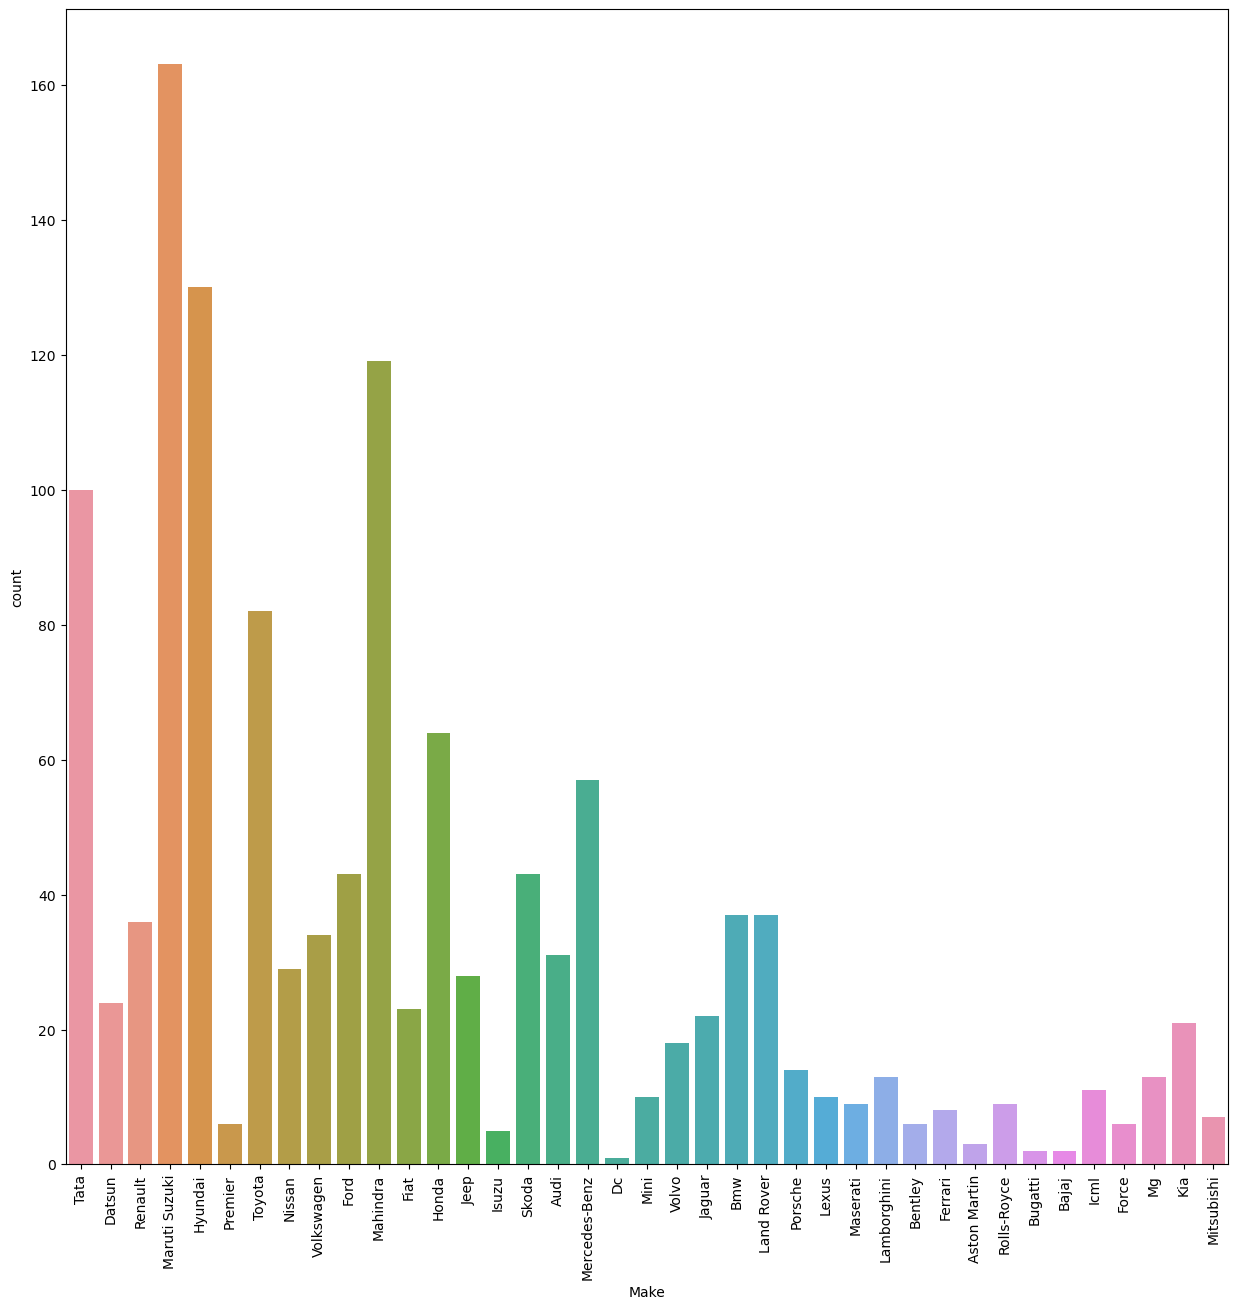

In [83]:
plt.figure(figsize=(15,15))
sns.countplot(x="Make",data=df)
plt.xticks(rotation=90);

##### Insight:
- Maruti suzuki has highest number of cars

- Hyundai has second number of highest cars

- DC has less number of cars

#### Min,Max, and Average price 

In [84]:
df["Price"].agg(["min","max","mean"])

min     2.364470e+05
max     2.121554e+08
mean    4.596538e+06
Name: Price, dtype: float64

#### Insight :
- Minimum price : 2.364470e+05 (i.e 2 lakhs 36 thousands)

- Maximum Price : 2.121554e+08 (i.e 21 crores)

- Average Price : 4.596538e+06 ( i.e 45 lakhs)

#### Companies whose price is greater than avg price of the car

In [85]:
df[df["Price"]>np.mean(df["Price"])][["Price","Model","Make"]].sort_values(by="Price",ascending=False)

,Price,Model,Make
356,212155397.0,Chiron,Bugatti
355,192142937.0,Chiron,Bugatti
1219,95000000.0,Rolls-Royce Phantom,Rolls-Royce
880,83755383.0,Rolls-Royce Drophead Coupe,Rolls-Royce
354,77312661.0,Rolls-Royce Phantom Coupe,Rolls-Royce
...,...,...,...
782,4690000.0,3-Series,Bmw
1034,4670000.0,Mercedes-Benz C-Class,Mercedes-Benz
1038,4654000.0,Mercedes-Benz C-Class,Mercedes-Benz
279,4633000.0,Xe,Jaguar


#### Insight :
- 107 cars having their price is greater than average price i.e 4.596538e+06 and above are the names of those cars.
- Bugatti has the highest above average price i.e. 212155397

<AxesSubplot:xlabel='Price', ylabel='Density'>

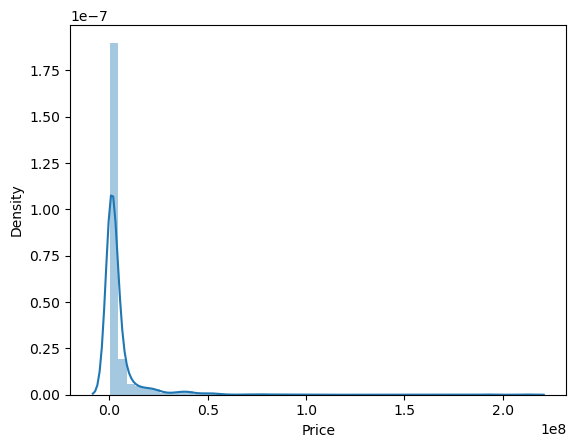

In [86]:
sns.distplot(df["Price"])

####  Detail of car having max price

In [87]:
df[df["Price"]==df["Price"].max()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Insight :
- Chiron of bugatti company was the most expensive car with above mentioned features.

#### Detail of car having min price

In [88]:
df[df["Price"]==df["Price"].min()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


#### Insight :
- Cheapest car was Nano Genx of company Tata with above features details

In [89]:
len(df[df["Price"]>=df["Price"].mean()])

244

#### 3.1 Saving the data of above average price in df_a 

In [90]:
df_a=df[df["Price"]>=df["Price"].mean()][["Make","Model","Variant","Price"]]
df_a

,Make,Model,Variant,Price
278,Jaguar,Xe,Se Diesel,4633000.0
279,Jaguar,Xe,Se Petrol,4633000.0
280,Jaguar,Xf,2.0 Prestige,5436329.0
281,Jaguar,Xf,2.0 Portfolio,6073446.0
282,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0
...,...,...,...,...
1253,Porsche,Cayenne Coupe,Base,13151000.0
1254,Porsche,Cayenne Coupe,Turbo,19763000.0
1263,Bentley,Flying Spur,V8,34167064.0
1264,Bentley,Flying Spur,W12,39382083.0


#### No of companies having price greater than average price

In [91]:
df_a["Make"].nunique()

20

##### Insight:
- 20 companies' cars price is greater than average price.

#### Name of companies having price greater than average price

In [92]:
df_a["Make"].value_counts().sort_values(ascending=False)

Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Volvo             9
Rolls-Royce       9
Maserati          9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Toyota            2
Bugatti           2
Ford              1
Nissan            1
Mitsubishi        1
Name: Make, dtype: int64

- Mercedes-Benz have the highest above average price then Land Rover and Bmw.

#### Find out the average price of car whose price is greater than average price of the cars in the data

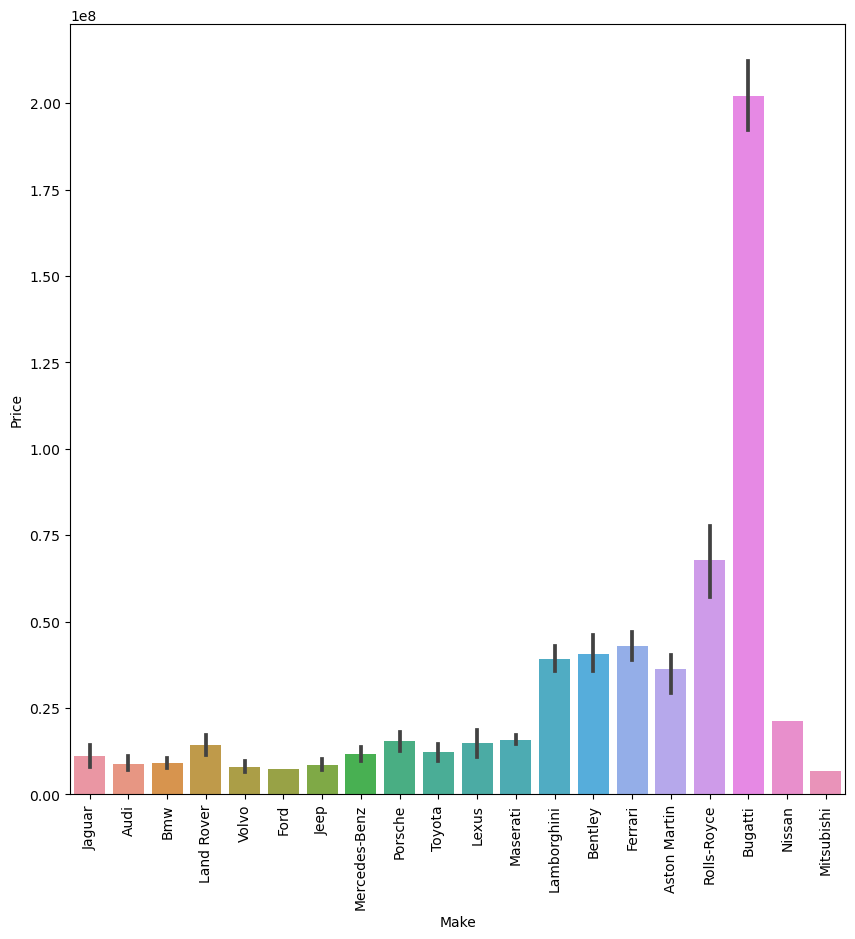

In [93]:
plt.figure(figsize=(10,10))
sns.barplot(x="Make",y="Price",data=df_a)
plt.xticks(rotation=90);

##### Insight :
- Most Expensive company's car :
                                - 1. Bugati
                                - 2. Rolls-Royace
                                - 3. Ferrari

- Least Expensive company's car : Mitsubishi

#### Average price of no of cars whose price is less than avg car price

In [94]:
len(df[df["Price"]<=df["Price"].mean()])

1032

<AxesSubplot:>

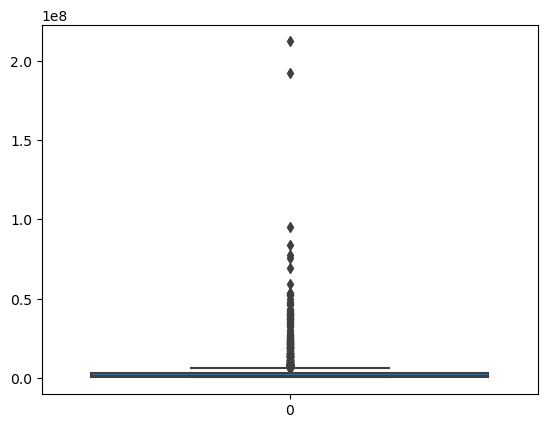

In [95]:
sns.boxplot(df["Price"])

- Variation in Price bcz of outliers.

In [96]:
df[df["Price"]>=150000000]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
355,16.0,2.0,2.0,6.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1479.0,1600.0,Digital,Digital,Digital,Yes,Petrol,5.95,MacPherson Strut,Torsion Beam,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


- Extreme outliers, we will do analysis without these two cars.

#### 3.2 Saving the data without extreme outliers in x

In [97]:
x=df[df["Price"]<=150000000]
x

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.60,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.60,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,23.00,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.90,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.60,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271

In [98]:
x["Price"].mean()

4286408.171114599

#### 3.3 Correlation of numeric columns w.r.t. price

In [99]:
df.corr()["Price"]

Cylinders                 0.817001
Doors                    -0.460311
Seating_Capacity         -0.307150
Number_of_Airbags         0.335710
Price                     1.000000
Displacement              0.792404
Power                     0.855190
Torque                    0.702151
ARAI_Certified_Mileage   -0.033971
Ground_Clearance         -0.042823
Boot_Space                0.043589
Name: Price, dtype: float64

#### Insight:
- Cylinders, Displacement, Power, and Torque are positively correlated.
- Seating_Capacity is negatively correlated.

###### Cylinders,Displacement,Power and Torque are considered important features with respect to car price.

#### 3.4 Taking numeric columns and see the relation with Price using scatter plot

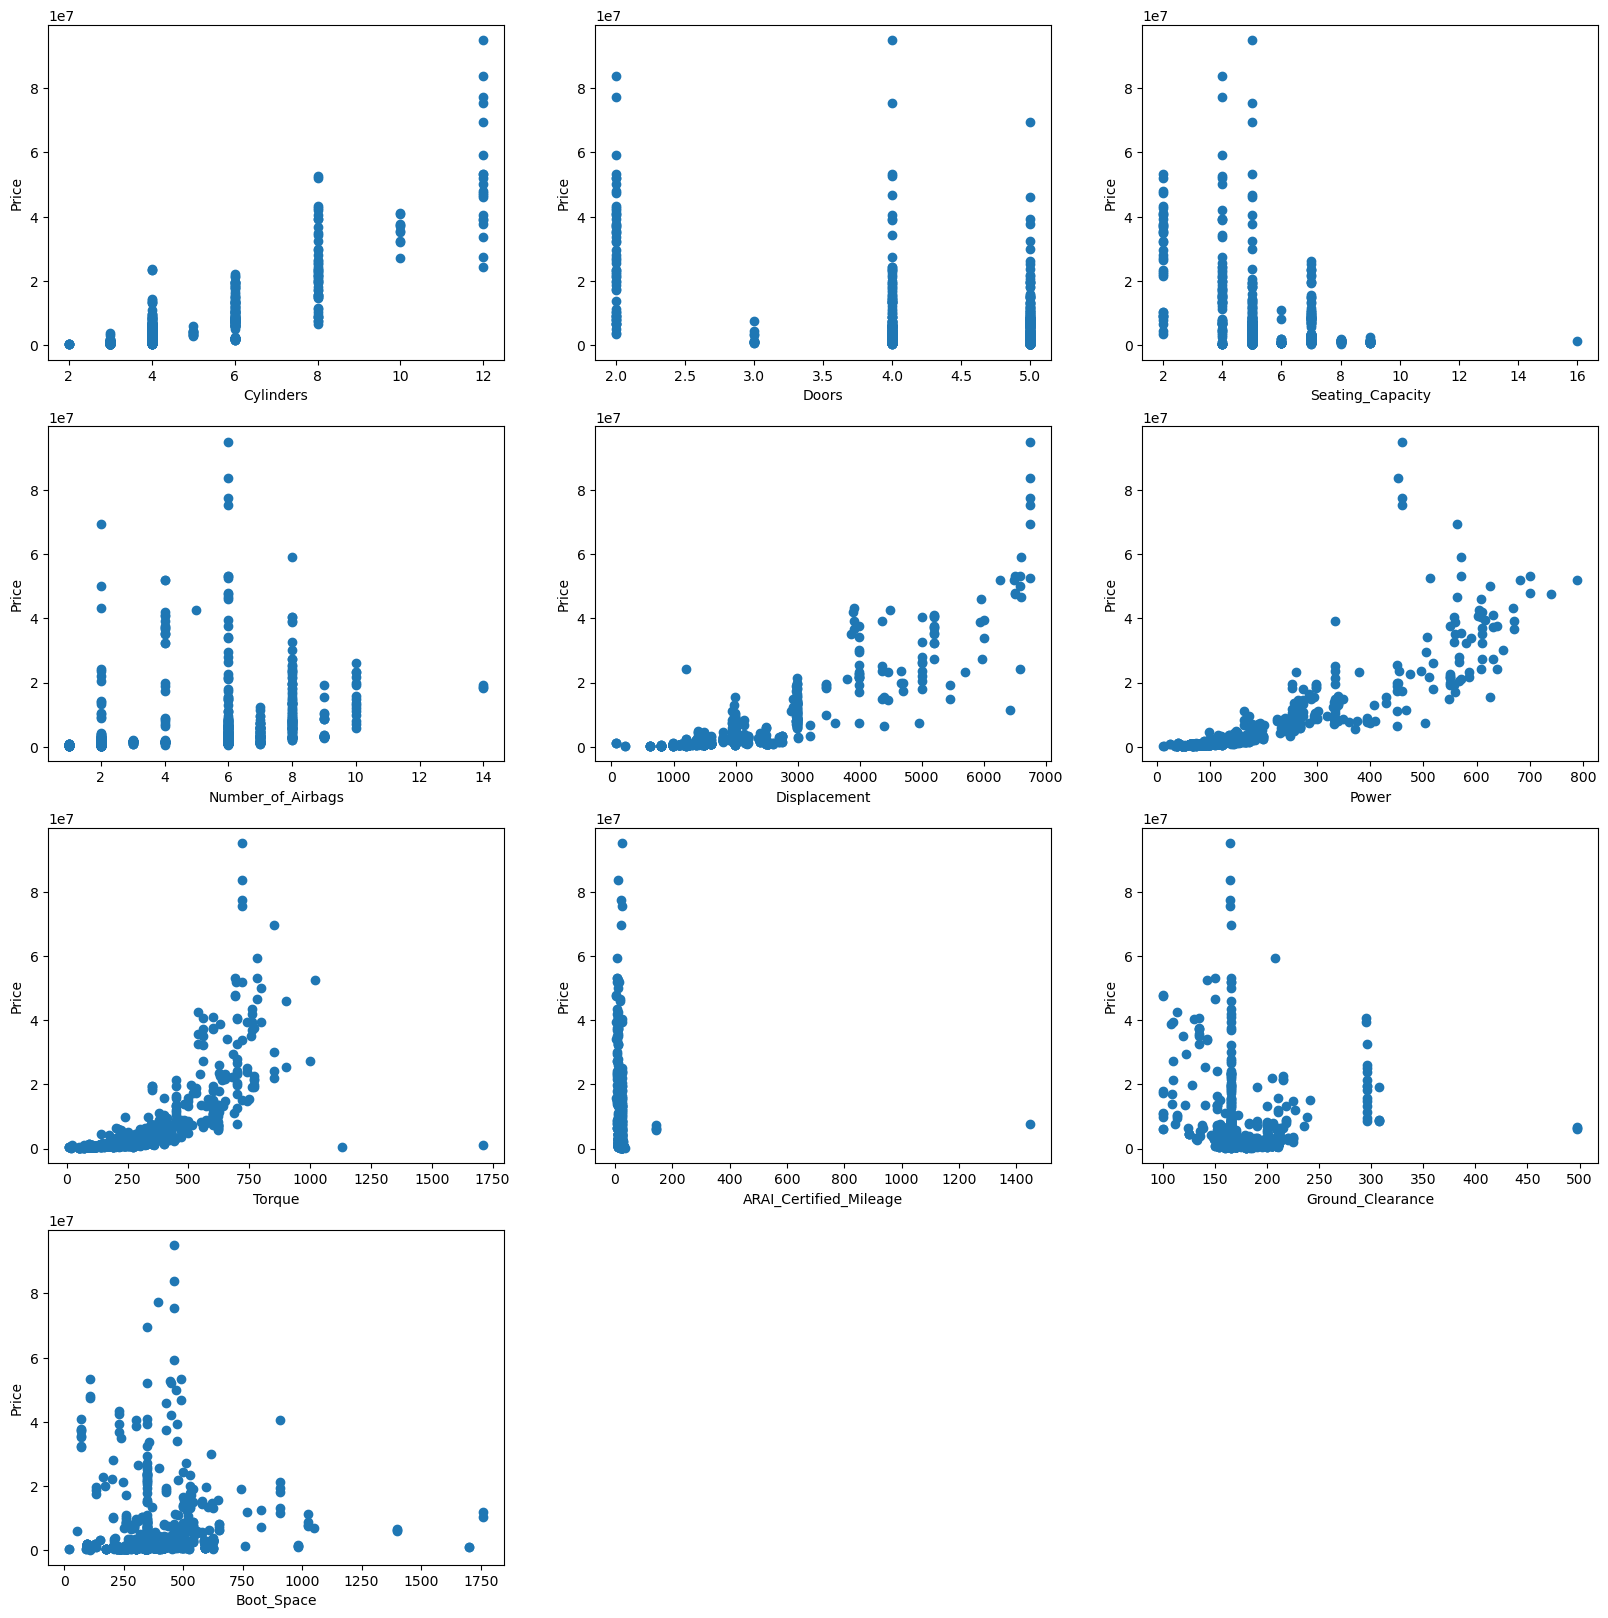

In [100]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(20,20))
for i in x.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(x[i],x["Price"])
        #plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

#### Insight:
- Price, Cylinders, Doors, and Seating_Capacity(mostly 4-5 seats cars are costlier) don't have linear relationship
- Displacement, Power, and Torque have sort of linear relationship

#### How many cars of each company?

In [101]:
df["Make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Mercedes-Benz     57
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Datsun            24
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Rolls-Royce        9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: Make, dtype: int64

#### Insight:
- Most Demanding companies are Maruti Suzuki, Hyundai, Mahindra, Tata, Toyota.
- Least in Demand is Dc

#### Min, Max, and avg Price of the cars based on their company

In [102]:
df.groupby(["Make"])["Price"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,192142937.0,212155397.0,2.021492e+08
Rolls-Royce,46709733.0,95000000.0,6.779633e+07
Ferrari,35000000.0,52000000.0,4.287250e+07
Bentley,33791059.0,52571294.0,4.056585e+07
Lamborghini,30000000.0,53210327.0,3.905392e+07


#### Insight:
- Top 3 expensive car brands are Bugatti, Rolls-Royce and Ferrari.
- Least expensive car is Bajaj.

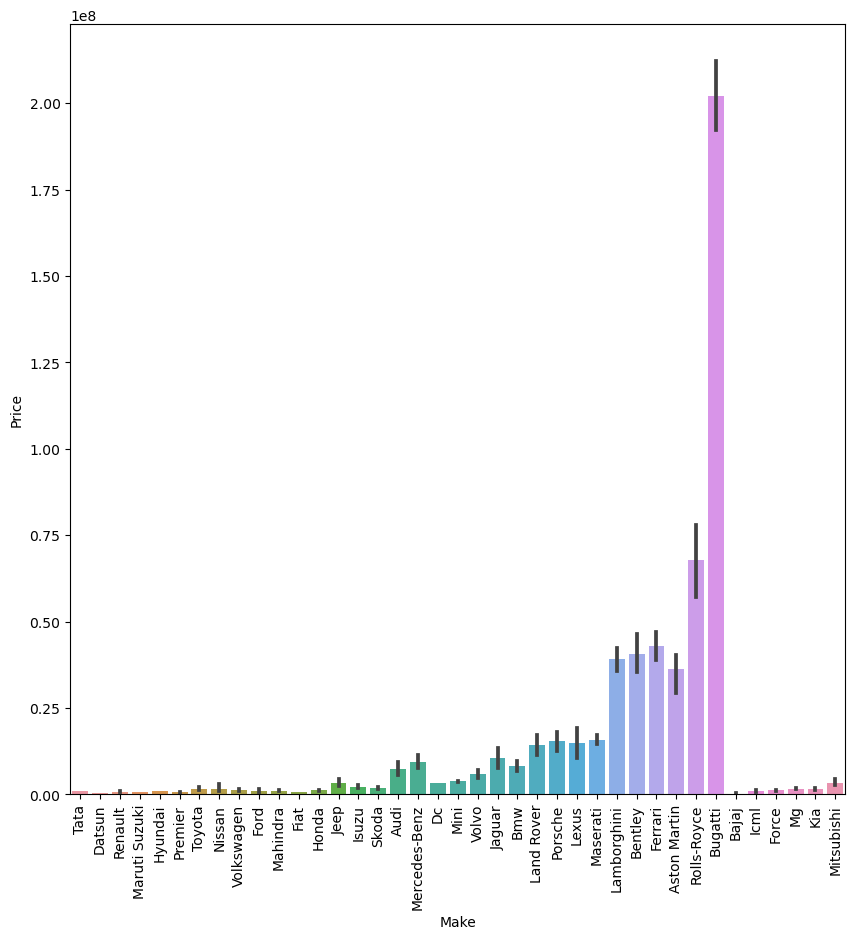

In [103]:
plt.figure(figsize=(10,10))
sns.barplot(x="Make",y="Price",data=df);
plt.xticks(rotation=90);

#### Insight :

###### Top 3 Expensive Company's cars average price :
- 1- Bugatti

- 2- Rolls- Royce

- 3- Ferari

##### Cheapest company's car average price:
- Datsun

#### Details of Top 3 expensive companies and their cars

In [104]:
df[((df["Make"]=="Bugatti")|(df["Make"]=="Ferrari")|(df["Make"]=="Rolls-Royce"))].head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
344,8.0,2.0,2.0,4.0,Ferrari,Portofino,V8 Convertible,35000000.0,3855.0,AWD (All Wheel Drive),BS IV,Smart Key,560.0,755.0,Digital,Analog,Analog,Yes,Petrol,9.00,Double wishbone suspension,Multilink,119.0,240.0,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
348,8.0,2.0,2.0,5.0,Ferrari,458 Speciale,Coupe,42531500.0,4497.0,AWD (All Wheel Drive),BS IV,Smart Key,605.0,540.0,Digital,Analog,Analog,Yes,Petrol,9.00,Twin wishbones,multi-link set-up,113.0,230.0,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,not_defined,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
349,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,6.6,46709733.0,6593.0,RWD (Rear Wheel Drive),BS IV,Smart Key,563.0,780.0,Digital,Analog,Analog,Yes,Petrol,17.30,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150.0,490.0,DVD Player with USB & Aux-in,not_defined,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
350,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,Ewb,53247201.0,6592.0,RWD (Rear Wheel Drive),BS IV,Smart Key,570.0,780.0,Digital,Analog,Analog,Yes,Petrol,7.29,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150.0,490.0,DVD Player with USB & Aux-in,not_defined,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
351,12.0,2.0,4.0,2.0,Rolls-Royce,Rolls-Royce Wraith,Coupe,50025840.0,6592.0,AWD (All Wheel Drive),BS IV,Smart Key,625.0,800.0,Digital,not_defined,Yes,Yes,Petrol,10.20,Double wishbone,Multi-Link,165.0,470.0,CD Player with USB & Aux-in,not_defined,"Fully automatic climate control, 2 Zone Climat...",not_defined,not_defined,Yes,Yes,Yes,not_defined,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,not_defined,Electric Adjustment with Memory,Yes,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Yes


#### Now we will find out why Bugatti, Rolls-Royce, and Ferrari are expensive cars, what features they have provided so we compare these on the basis of some premium features based on domain knowledge .

#### 3.5 We will consider following premium features in order to differentiate the above top 3 expensive cars with respect to price:
- Premium feeatures which makes the difference of price in above premium cars(top 3 expensive cars)

- CYLINDER
- DISPLACEMENT
- POWER
- TORQUE


In [105]:
grp=df.groupby(["Make"])["Cylinders","Displacement","Power","Torque"]

In [106]:
grp.get_group("Bugatti")

,Cylinders,Displacement,Power,Torque
355,16.0,7993.0,1479.0,1600.0
356,16.0,7993.0,1600.0,1479.0


- Bugatti has 16 cylinders and highest Displacement, Power and Torque, features for high cost.

In [107]:
grp.get_group("Rolls-Royce")

,Cylinders,Displacement,Power,Torque
349,12.0,6593.0,563.0,780.0
350,12.0,6592.0,570.0,780.0
351,12.0,6592.0,625.0,800.0
353,12.0,6750.0,563.0,850.0
354,12.0,6749.0,460.0,720.0
879,12.0,6598.0,571.0,780.0
880,12.0,6749.0,453.0,720.0
1219,12.0,6749.0,460.0,720.0
1220,12.0,6749.0,460.0,720.0


- Rolls-Royce has 12 cylinders and second highest Displacement, Power and Torque.

In [108]:
grp.get_group("Ferrari")

,Cylinders,Displacement,Power,Torque
344,8.0,3855.0,560.0,755.0
348,8.0,4497.0,605.0,540.0
872,8.0,3902.0,670.0,760.0
873,8.0,3902.0,670.0,760.0
874,8.0,3900.0,610.0,760.0
875,8.0,6262.0,681.0,697.0
1058,12.0,6496.0,789.0,718.0
1172,8.0,3902.0,669.0,760.0


- Ferrari has 8 and 12 cylinders and third highest Displacement, Power and Torque.

#### Insight :
- From above output we can see no.of cylinders in buggati is maximum and in rolls royce and ferrari none of the above premium feature clearly differentiate them so based on other features we can say their price is different since ferrari is top brand sport car and Rolls Royce is the epitome of comfort so their type is totally different.

#### 3.6 Buyers can choose the car based on the following important features:
- 1. safety---- no of airbags
- 2. power
- 3. torque 
- 4. mileage
- 5. seating_capacity and 
- 6. fuel_type.

#### 1 Number_of_Airbags

#### Maximum,minimum and average air bags a company can give

In [109]:
df.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Lexus,8.0,14.0,10.600000
Audi,4.0,10.0,7.580645
Land Rover,2.0,10.0,7.486486
Aston Martin,6.0,8.0,7.333333
Mercedes-Benz,2.0,10.0,7.192982


#### Insight :
###### According to safety point of view top 3 companies :

- 1- Lexus

- 2- Audi

- 3- land rover

###### Found to be good company cars which provides average 10.6, 7.58 , 7.48 number of air bags repectively.

#### 2 Power

#### Max,min and average power a company can give

In [110]:
df.groupby(["Make"])["Power"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,1479.0,1600.0,1539.500000
Ferrari,560.0,789.0,656.750000
Lamborghini,571.0,740.0,636.461538
Bentley,507.0,616.0,563.833333
Aston Martin,505.0,608.0,557.666667


#### Insight :
##### According to Power point of view top 4 companies :

- 1- Bugatti

- 2- Ferrari

- 3- Lamborghini

- 4- Bentley

###### Found to be good company cars which provides average power 1539.5, 656.75, 636.46 , 563.83 repectively.

#### 3 Torque

#### Max,min and average Torque of each company 

In [111]:
df.groupby(["Make"])["Torque"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,1479.0,1600.0,1539.500000
Bentley,660.0,1020.0,811.666667
Rolls-Royce,720.0,850.0,763.333333
Ferrari,540.0,760.0,718.750000
Aston Martin,630.0,700.0,671.666667


#### Insight :
##### According to Torque point of view top 4 companies :

- 1- Bugatti

- 2- Bentley

- 3- Rolls-Royce

- 4- Ferrari

###### Found to be good company cars which provides average torque 1539.5, 811.6, 763.33, 718.75  repectively.

#### 4 Seating_Capacity

#### Max,min and average seating capacity of each company

In [112]:
df.groupby(["Make"])["Seating_Capacity"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Icml,7.0,9.0,8.454545
Mitsubishi,7.0,7.0,7.000000
Mahindra,4.0,9.0,6.512605
Land Rover,4.0,7.0,6.135135
Isuzu,5.0,7.0,5.800000


#### Insight :
##### According to seating_capacity point of view top 3 companies :

- 1- Icml : 8 seater

- 2- Mitsubishi : 7 seater

- 3- Mahindra : 6 seater

####  5 ARAI_Certified_Mileage	

#### Max,min and average Mileage of each company 

In [113]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Mercedes-Benz,7.8,1449.00,48.901754
Bajaj,23.0,35.00,29.000000
Maruti Suzuki,11.9,28.40,22.531534
Honda,14.4,27.40,21.362500
Datsun,20.1,25.17,21.353333


#### From above we can see The company Mercedes-Benz gives maximum mileage : 142 which is not possible there might be typing mistake it might be 14.2

In [114]:
df[(df["ARAI_Certified_Mileage"]==142.0)]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
794,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E350 D,7285332.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
795,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D,5964321.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
799,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D Expression,5850000.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
800,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D Exclusive,6250000.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes


- The entries are found at index number 794,795,799 and 800 so we correct it with 14.2:

In [115]:
df.loc[794,"ARAI_Certified_Mileage"]=14.2
df.loc[795,"ARAI_Certified_Mileage"]=14.2
df.loc[799,"ARAI_Certified_Mileage"]=14.2
df.loc[800,"ARAI_Certified_Mileage"]=14.2

In [116]:
df.loc[794,"ARAI_Certified_Mileage"]

14.2

- The entries have been rectified now compute the max,min average again.

In [117]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Mercedes-Benz,1449.00,7.80,39.933333
Bajaj,35.00,23.00,29.000000
Maruti Suzuki,28.40,11.90,22.531534
Honda,27.40,14.40,21.362500
Datsun,25.17,20.10,21.353333
Mg,23.00,17.41,21.280000
Ford,26.10,10.91,21.145349
Tata,27.28,14.00,20.927800
Renault,25.17,13.86,20.630000


#### Insight :
##### According to ARAI_Certified_Mileage point of view top 3 companies :

- 1- Bajaj

- 2- Maruti Suzuki

- 3- Honda

###### Found to be good company cars which provides average ARAI_Certified_Mileage 29, 22.5 , 21.3 repectively.

#### 6 Fuel_type

In [118]:
df["Fuel_Type"].value_counts()

Petrol          643
Diesel          582
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

- Customers preferred Petrol fuel_type.

In [119]:
g_f=df.groupby(["Make"])["Fuel_Type"]

In [120]:
#for i in df["Make"]:
    #print(i,"\n",g_f.get_group(i).values)

#### 7 Extra Features

#### Taking those  features having only two unique values (yes or no) and we will treat them as extra features.

In [121]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features

['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

#### df2 having extra features with company name and price

In [122]:
df2=df[extra_features]
df2  

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility,Model
0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
1,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
2,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined,Nano Genx
3,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Nano Genx
4,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1272,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1273,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1274,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,Yes,Honda,1201000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City


#### We will compare with Model not Make

##### Making copy of df2 and save it to df3 having extra features and setting model as index.

In [123]:
df3=df2.copy()
df3.set_index("Model",inplace=True)
df3

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility
Model,,,,,,,,,,,,,,,,,,
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes


#### Zipping of model name with their corresponding column values

In [124]:
for i,j in zip(df3.index,df3.values):
    print(i,"-------------",j)

Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 292667.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 236447.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 296661.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Yes' 'Yes' 'not_defined'
 'not_defined']
Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 334768.0 'not_defined'
 'not_defined' 'not_defined' 'Yes' 'not_d

#### Counting the number of yes features a model has along with its price.

In [125]:
for i,j in zip(df3.index,df3.values):
    c=0
    l=[]
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print("Model--------",i,",--------Count------",c,",---------Price-------",j[9])

Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 292667.0
Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 236447.0
Model-------- Nano Genx ,--------Count------ 2 ,---------Price------- 296661.0
Model-------- Nano Genx ,--------Count------ 1 ,---------Price------- 334768.0
Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 272223.0
Model-------- Nano Genx ,--------Count------ 1 ,---------Price------- 314815.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 279650.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 351832.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 333419.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 362000.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 390000.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 437065.0
Model-------- Kwid ,--------Count------ 4 ,---------Price-------

#### Insight :
###### From above output we can see price increases with increase number of features and those models which have different price on same number of features where other factors like torque , power matters like nano genx cars' etc.


###### Not much of a relation of Price with these features as we can see, with some model price increases and with some model its decreases.

## Step 4 : Data Preparation

In [126]:
df.shape

(1276, 49)

#### We will use Mean Target encoding,and its drawback is Data Leakage(Overfitting) and for overfitting we will use cross validation.

#### 4.1 Dropping irrelevant features from ML POV.

In [127]:
df.drop(columns=["Make","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Key_Off_Reminder","Cooled_Glove_Box","Gear_Shift_Reminder","Rain_Sensing_Wipers","Seat_Height_Adjustment","Adjustable_Steering_Column","Rear_Center_Armrest"],inplace=True)

In [128]:
df.shape

(1276, 34)

#### 4.2 Encoding
- Label Encoding for Yes/NO values:

In [129]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df[i].replace({"Yes":1,"not_defined":0},inplace=True)
df.head(3)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Petrol,23.6,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Petrol,23.6,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,CNG,23.0,180.0,110.0,1,1,0,0,0,not_defined,0,0,0,0,0,0,0,0,0


#### 4.2.1 ENCODING of the remaining columns

In [130]:
df["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [131]:
df["Drivetrain"]=df["Drivetrain"].replace({"RWD (Rear Wheel Drive)":0,"FWD (Front Wheel Drive)":1,"AWD (All Wheel Drive)":2,"4WD":3})

In [132]:
df["Emission_Norm"].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [133]:
df["Emission_Norm"]=df["Emission_Norm"].replace("BS 6","BS VI")

In [134]:
df["Emission_Norm"]=df["Emission_Norm"].replace({'BS III':0,'BS IV':1, 'BS VI':2})

In [135]:
df["Keyless_Entry"].unique()

array(['Remote', 'not_defined', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [136]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [137]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({'not_defined':0,'Remote':1, 'Yes':2, 'Smart Key':3,'Smart Key, Remote':4})

In [138]:
df["Odometer"].unique()

array(['Digital', 'Analog', 'not_defined', 'Digital, Analog', 'Yes'],
      dtype=object)

In [139]:
df["Odometer"]=df["Odometer"].replace({'not_defined':0,'Digital':1, 'Analog':2, 'Digital, Analog':3, 'Yes':4})

In [140]:
df["Speedometer"].unique()

array(['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog',
       'not_defined', 'Yes'], dtype=object)

In [141]:
df["Speedometer"]=df["Speedometer"].replace( 'Digital, Analog','Analog, Digital')

In [142]:
df["Speedometer"]=df["Speedometer"].replace({'Analog':0, 'Digital':1, 'Analog, Digital':2,'not_defined':3, 'Yes':4})

In [143]:
df["Fuel_Type"]=df["Fuel_Type"].replace({"Petrol":0,"CNG":1,"Diesel":2,"CNG + Petrol":3,"Hybrid":4,"Electric":5})

In [144]:
df["Parking_Assistance"].unique()

array(['not_defined', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera',
       'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Front sensors, Rear sensors', 'Rear sensors, Front sensors',
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

In [145]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})

In [146]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({'not_defined':0, 'Rear sensors':1, 'Rear sensors with camera':2,
                                                           'Front and rear sensors with camera':3,
                    'Yes':4, 'Front & rear sensors with 360 degree view':5,'Rear sensors, Front sensors':6})

In [147]:
df.shape

(1276, 34)

#### 4.2.2 We will apply Mean Target Encoding on Model and Variant.

In [148]:
df2=df.groupby(["Model"])["Price"].agg(["mean"]).reset_index()
df2.head()

,Model,mean
0,3-Series,4.540000e+06
1,458 Speciale,4.253150e+07
2,458 Spider,4.336750e+07
3,488 Gtb,3.804048e+07
4,5-Series,6.196667e+06


##### Model

In [149]:
l=[]
for i in df["Model"]:
    for j,k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])

In [150]:
l

[291263.5,
 291263.5,
 291263.5,
 291263.5,
 291263.5,
 291263.5,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 403397.6,
 403397.6,
 403397.6,
 403397.6,
 403397.6,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 451557.0,
 451557.0,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 516714.125,

In [151]:
df["Model"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,Xt,292667.0,624.0,0,1,1,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,Xe,236447.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,Emax Xm,296661.0,624.0,0,1,0,38.0,51.0,1,0,1,23.0,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,Xta,334768.0,624.0,0,1,1,38.0,51.0,1,0,0,21.9,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,Xm,272223.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Variant

In [152]:
df2=df.groupby(["Variant"])["Price"].agg(["mean"]).reset_index()
df2.head()

,Variant,mean
0,1.0 S,390000.0
1,1.0 S Amt,437065.0
2,1.0 Turbo Gdi Dct S,940000.0
3,1.0 Turbo Gdi Dct Sx Plus,1115500.0
4,1.0 Turbo Gdi Mt S,826000.0


In [153]:
l=[]
for i in df["Variant"]:
    for j,k in df2.iterrows():
        if i==k["Variant"]:
            l.append(k["mean"])

In [154]:
l

[292667.0,
 465723.5,
 296661.0,
 334768.0,
 813741.0,
 572407.5,
 327320.0,
 452306.6666666667,
 401704.5,
 12957880.857142856,
 390000.0,
 437065.0,
 353290.0,
 283290.0,
 383290.0,
 413290.0,
 433290.0,
 454490.0,
 463290.0,
 484490.0,
 440990.0,
 470990.0,
 462190.0,
 492190.0,
 352136.0,
 380573.0,
 392967.0,
 466057.0,
 425255.0,
 490423.6666666667,
 527564.8888888889,
 616345.0,
 453203.25,
 439777.0,
 481316.5,
 327320.0,
 452306.6666666667,
 502492.0,
 499990.0,
 401704.5,
 528464.0,
 553015.0,
 594464.0,
 618015.0,
 422444.0,
 480670.0,
 429990.0,
 503990.0,
 547990.0,
 530990.0,
 512990.0,
 578990.0,
 570990.0,
 556490.0,
 517500.0,
 520000.0,
 610000.0,
 649000.0,
 610000.0,
 620000.0,
 699000.0,
 660000.0,
 453203.25,
 527564.8888888889,
 634770.0,
 481316.5,
 663554.2,
 540350.0,
 633867.5,
 552350.0,
 713898.0,
 666898.0,
 607841.0,
 560841.0,
 483320.0,
 630320.0,
 583320.0,
 495000.0,
 559000.0,
 609000.0,
 663000.0,
 584666.6666666666,
 692253.0,
 670000.0,
 603000.0,

In [155]:
df["Variant"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,292667.0,292667.0,624.0,0,1,1,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,465723.5,236447.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,296661.0,296661.0,624.0,0,1,0,38.0,51.0,1,0,1,23.0,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,334768.0,334768.0,624.0,0,1,1,38.0,51.0,1,0,0,21.9,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,813741.0,272223.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 5 : Data Modelling and Evaluation

#### 5.1 Checking shape of data 

In [156]:
df.shape

(1276, 34)

#### 5.2 Checking that all the columns are of numeric type

In [157]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                        float64
Variant                                      float64
Price                                        float64
Displacement                                 float64
Drivetrain                                     int64
Emission_Norm                                  int64
Keyless_Entry                                  int64
Power                                        float64
Torque                                       float64
Odometer                                       int64
Speedometer                                    int64
Fuel_Type                                      int64
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

#### 5.3 Seggregate x and y

In [158]:
x=df.drop(columns=["Price"])
y=df["Price"]

#### 5.4 Scaling(Standard Scaler), required for linear and KNN.

In [159]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

##### Bcz of Mean Target, chances of overfitting that's why we used cross validation

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### 5.5 We will compare different Supervised learning models and compare the results based on r square metric and choose the one which is more efficient .

In [161]:
lr=LinearRegression()

In [162]:
knn=KNeighborsRegressor()

In [163]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores=cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score

[0.9718349130747809, 0.8597374465115039]

In [164]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()

In [165]:
Model=[dtc,rfr,gbr,xgb,adb]

In [166]:
for i in Model:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores=cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r=np.mean(scores)
    r2score.append(r)

In [167]:
r2score

[0.9718349130747809,
 0.8597374465115039,
 0.975015612989836,
 0.9637799159459688,
 0.9753168638205281,
 0.9826580015919089,
 0.94657970369878]

In [168]:
Model_names=["LinearRegression","KNN","DecisionTree","Randomforest","gradientboost","xgboost","adaboost"]

#### 5.6 Making a DataFrame of Models and r2 score and saving it in df_final.

In [169]:
df_final=pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
df_final

,Regressor Models,r square
0,LinearRegression,0.971835
1,KNN,0.859737
2,DecisionTree,0.975016
3,Randomforest,0.963780
4,gradientboost,0.975317
5,xgboost,0.982658
6,adaboost,0.946580


#### Visually we can see it as below using bar plot

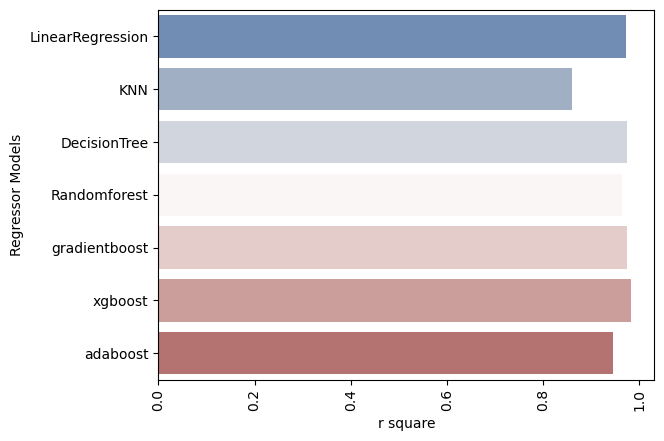

In [170]:
sns.barplot(x="r square",y="Regressor Models",orient="h",data=df_final,palette="vlag")
plt.xticks(rotation=90);

## Step 6:  Conclusion

##### In this notebook, I have done cleaning , feature engineering ,extracted hidden insights and see the data trends with respect to price from business and buyers point of view and also enables buyers how they can purchase the cars based on following factors:
1) Safety

2) Power

3) Torque

4) seating_capacity

5) Mileage

6) Extra Features

###### I used selectkbest and multicoolinearity as feature selection technique and prepared the data for modelling and then we applied 7 different Regressor models on data and evaluated them based on r square metric . It is found that xgboost performs better with r square 98.2658 %

